## Binomial and Trinomial Model for Option Pricing (Euro)


The BOPM and TOPM are specific cases of a multinomial distribution, that is, for example in the case of the BOPM, we have two different outcomes with assigned probabilities, and we can have as many trails as needed.

In both models used below, we have specifically used the up and down factors to ensure that for many trials, we should converge on the price given from the BSM model. Also remember that a Binomial distribution can be shown to converge to the normal distribution as we increase the number of trials, so the previous statement isnt surprising, and highlights the very deliberate choice for these methods use in pricing options

## Generic Binomial Method (Slow)

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [14]:
# Initialise parameters
S0 = 100      # initial stock price
K = 100       # strike price
T = 1         # time to maturity in years
r = 0.06      # annual risk-free rate
vol = 0.3    # volatility
N = 30        # number of time steps
opttype = 1 # Option Type 1 for call, 2 for Put

In [4]:
norm = norm.cdf

def BS_CALL(S0, K, T, r, vol):
    d1 = (np.log(S0/K) + (r + vol**2/2)*T) / (vol*np.sqrt(T))
    d2 = d1 - (vol * np.sqrt(T))
    return S0 * norm(d1) - K * np.exp(-r*T)* norm(d2)

In [5]:

def BinomEuro(S0,K,T,r,N,vol,opttype):
    #Compute Constants
    dt = T/(N)
    disc = np.exp(-r*dt)
  
    A = (1/2)*(np.exp(-r*dt) + np.exp((r+vol**2)*dt))

    u = A + np.sqrt((A**2)-1) #Move up
    d = A - np.sqrt((A**2)-1) #Move down
    qu = (np.exp(r*dt)-d)/(u-d)
    qd = 1 - qu
    
    
    # Initialise underlying price 
    
    S = np.zeros(N+1)
    S[0]=S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d
    
    # Initialise option values at maturity
    C = np.zeros(N+1)
    
    if opttype == 1:
        for j in range(0,N+1):
            C[j]=max(0,S[j]-K)
  
    elif opttype == 2:
        for j in range(0,N+1):
             C[j]=max(0,K-S[j])
 
        

    #Traverse backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( qu*C[j+1] + (qd)*C[j] )
    
    return C[0]

            
    
    
print(BinomEuro(S0,K,T,r,N,vol,opttype)) 
print(BS_CALL(S0, K, T, r, vol))
    
        


14.644810381657857
14.717072420289298


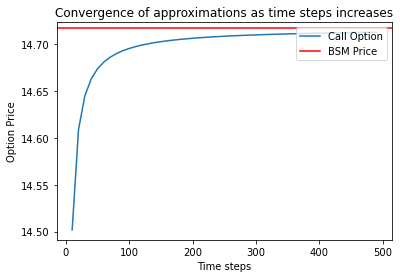

In [11]:
BinomEuCall = []

periods = range(10,500,10)
for i in periods:
    price = BinomEuro(S0,K,T,r,i,vol,1)
    BinomEuCall.append(price)

    
plt.plot(periods,BinomEuCall, label='Call Option' )
plt.title('Convergence of approximations as time steps increases')
plt.axhline(y=14.7170, color='r', linestyle='-', label='BSM Price')
plt.legend(loc='upper right')
plt.xlabel("Time steps")
plt.ylabel("Option Price")
plt.show()
    
    


## Trinomial Method 

(Work in progress)

In [29]:
## 1 for call, 2 for put


def TrinomEuro(S0,K,T,r,N,vol,opttype):
    
    ### Constants
    Lambda = 2
    dt = T/(N)
    disc = np.exp(-r*dt)
    
    
    u = np.exp(vol*Lambda*np.sqrt(dt))
    d = np.exp(-vol*Lambda*np.sqrt(dt))
    m = 1
    
    rootdt = np.sqrt(dt)
    
    qu = (1/2*Lambda**2) + ((r - (vol**2)/2)*rootdt)/(2*Lambda*vol)
    
    qd = 1 - 1/Lambda**2
    
    qm = (1/2*Lambda**2) - ((r - (vol**2)/2)*rootdt)/(2*Lambda*vol)
    
    #Initialise underlying price tree
    
      
            
            
    
